KNN nearest neighbours


Reading dataset

In [1]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")


In [2]:
df=pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Checking missing values

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

seperate x and y


In [6]:
x=df.drop(columns=["species"])
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y=df[["species"]]
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


seperate cat and con in x


In [8]:
cat=list(df.columns[df.dtypes=="object"])
cat

['species']

In [10]:
con=df.columns[df.dtypes!="object"]
con

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

creating preprocessing pipeline


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [15]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy="mean")),
                         ('scaler',StandardScaler())]).set_output(transform="pandas")

In [17]:
x_pre=num_pipe.fit_transform(x)
x_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Splitting dataset into train an test

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pre,y,test_size=0.30)

In [19]:
x_train.shape

(105, 4)

In [20]:
x_test.shape

(45, 4)

model creation

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=40)
model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=40)

In [22]:
model.score(x_train,y_train)

0.8857142857142857

In [23]:
model.score(x_test,y_test)

0.8222222222222222

Hyperparameter Tuning

In [25]:
params={
    "n_neighbors":[1,2,3,4,5,6,7,8,9,10]
}

In [32]:
from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier()
gscv=GridSearchCV(model,param_grid=params,cv=5,scoring="f1_macro")
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_macro')

In [33]:
gscv.best_params_

{'n_neighbors': 8}

In [34]:
best_knn=gscv.best_estimator_

In [35]:
best_knn

KNeighborsClassifier(n_neighbors=8)

In [36]:
best_knn.score(x_train,y_train)

0.9809523809523809

predict result

In [37]:
y_pred_tr=best_knn.predict(x_train)
y_pred_tr[:5]

array(['versicolor', 'virginica', 'versicolor', 'virginica', 'setosa'],
      dtype=object)

In [38]:
y_pred_ts=best_knn.predict(x_test)
y_pred_ts[:5]

array(['setosa', 'virginica', 'virginica', 'virginica', 'setosa'],
      dtype=object)

Display Confusion matrix

In [39]:
from sklearn.metrics import *


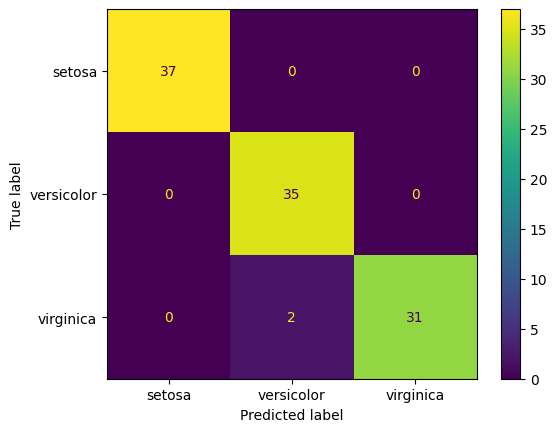

In [40]:
cm=confusion_matrix(y_train,y_pred_tr)
cmd=ConfusionMatrixDisplay(cm,display_labels=best_knn.classes_)
cmd.plot()

Display Classification report

In [41]:
print(classification_report(y_train,y_pred_tr))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        37
  versicolor       0.95      1.00      0.97        35
   virginica       1.00      0.94      0.97        33

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



predict out of sample data

In [42]:
x_new=pd.read_csv("iris_sample.csv")
x_new.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


In [43]:
x_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  15 non-null     float64
 1   sepal_width   14 non-null     float64
 2   petal_length  14 non-null     float64
 3   petal_width   14 non-null     float64
dtypes: float64(4)
memory usage: 612.0 bytes


In [44]:
x_new.isna().sum()

sepal_length    0
sepal_width     1
petal_length    1
petal_width     1
dtype: int64

In [45]:
x_new_pre=num_pipe.transform(x_new)

In [46]:
x_new_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671


In [47]:
pred=best_knn.predict(x_new_pre)
pred[:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

Display probabilities

In [49]:
prob=best_knn.predict_proba(x_new_pre)
prob

array([[0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.25 , 0.75 ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.125, 0.875],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.875, 0.125],
       [0.   , 0.75 , 0.25 ]])

Save result to file

In [50]:
x_new["predict"]=pred
x_new.head()

,sepal_length,sepal_width,petal_length,petal_width,predict
0,5.5,2.5,4.0,1.3,versicolor
1,6.9,3.1,5.1,2.3,virginica
2,5.1,2.5,3.0,1.1,versicolor
3,4.4,2.9,NaN,0.2,setosa
4,5.9,3.0,5.1,1.8,virginica


In [51]:
x_new.to_csv("result.csv",index=False)

Plotting result

<Axes: title={'center': 'countplot for species'}, xlabel='predict'>

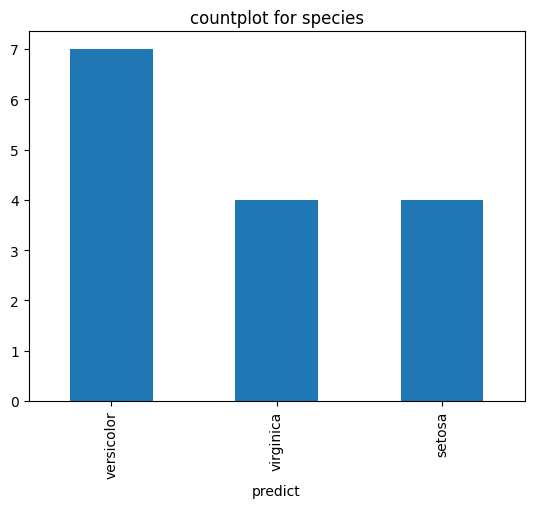

In [54]:
x_new["predict"].value_counts().plot(kind="bar",title="countplot for species")